In [1]:
import sys
sys.path.append('../../src')
from Perceptron import Perceptron
from metrics import accuracy_score, confusion_matrix, recall, precision
import numpy as np
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
from matplotlib import colormaps
import seaborn as sns
from numpy.random import normal
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron as skPerceptron
from sklearn.metrics import confusion_matrix as skcm
from sklearn.metrics import accuracy_score as skas
from sklearn.metrics import recall_score as skrc

# Binary Classification Examples

## Using make_blob from sklearn library

## Generating data

In [3]:
X, y = make_blobs(n_samples= 400, cluster_std=[2.0,1.0], centers=[(0,7),(3,3)], random_state=23)

In [5]:
X.shape, y.shape

((400, 2), (400,))

Text(0, 0.5, 'Feature2')

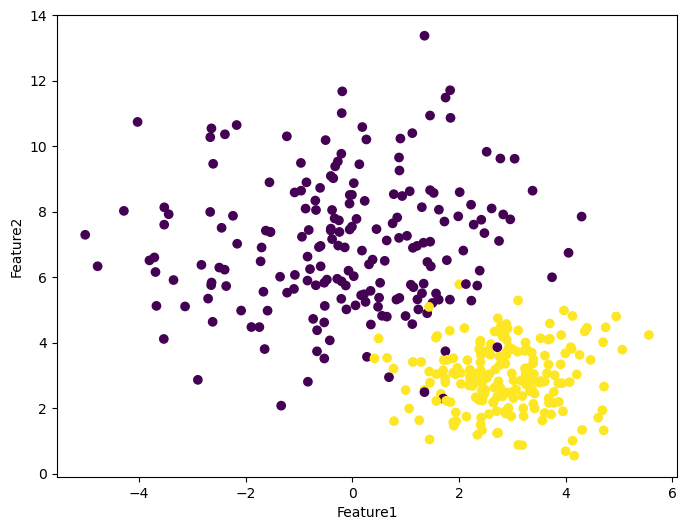

In [8]:
# Data Visualization
plt.figure(figsize=(8,6))
plt.scatter(X[:,0], X[:,1], c=y)
plt.xlabel('Feature1')
plt.ylabel('Feature2')

### Spliting data into train and test sets

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=27)

## Applying Perceptron Classification

#### Linear activation

In [11]:
myperceptron = Perceptron(input_size=2,output_size=1, learning_rate=0.001, random_seed=42)

In [13]:
myperceptron.fit(X_train, y_train)

In [15]:
myperceptron.coeffs

array([[ 0.38657978],
       [ 0.01787342],
       [-0.09487143]])

In [17]:
y_pred = myperceptron.predict(X_test)

In [19]:
myperceptron.evaluate(X_test, y_test)

0.975

In [21]:
# Accuracy score
# y_pred needs to be flattened as it is in column format
accuracy_score(y_test, y_pred.flatten())

0.975

array([[42,  2],
       [ 0, 36]])

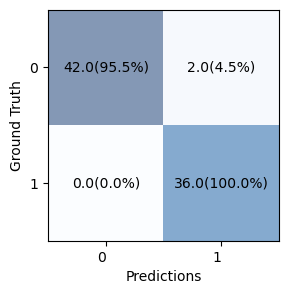

In [23]:
confusion_matrix(y_test, y_pred, visualize=True)

In [25]:
recall(y_test, y_pred)

1.0

In [27]:
precision(y_test, y_pred)

0.9473684210526315

Text(0.5, 1.0, 'Ground Truth')

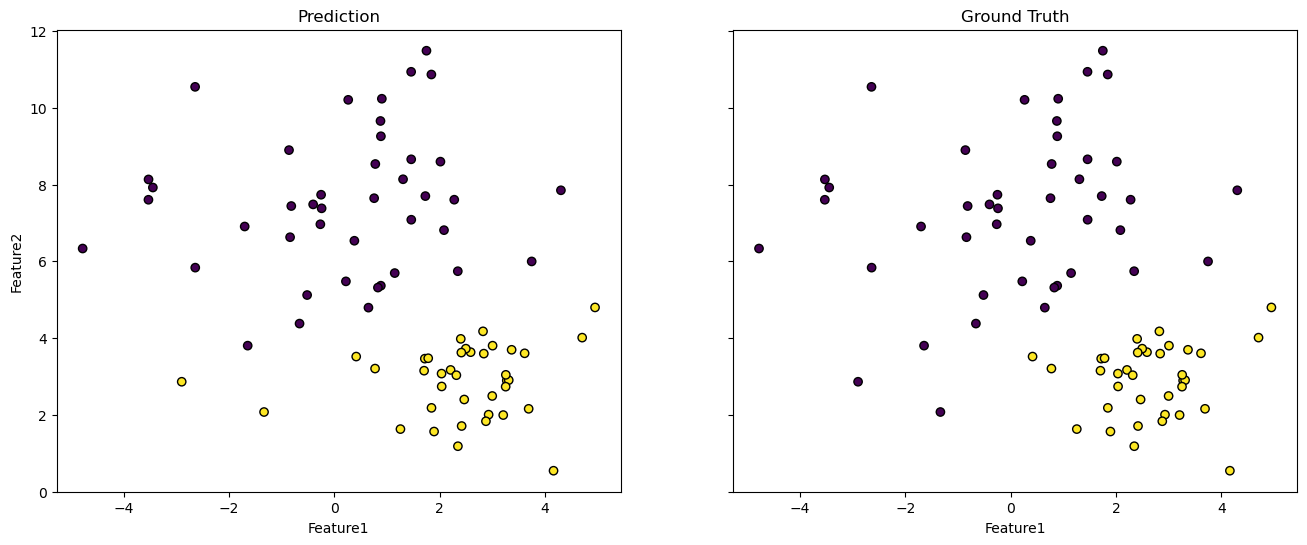

In [29]:
# Data Visualization
fig, ax = plt.subplots(1,2, figsize=(16,6), sharey=True)
ax[0].scatter(X_test[:,0], X_test[:,1], c=y_pred, edgecolors='k')
ax[0].set_xlabel('Feature1')
ax[0].set_ylabel('Feature2')
ax[0].set_title('Prediction')
ax[1].scatter(X_test[:,0], X_test[:,1], c=y_test, edgecolors='k')
ax[1].set_xlabel('Feature1')
ax[1].set_title('Ground Truth')

#### Sigmoid activation

In [36]:
myperceptron = Perceptron(input_size=2,output_size=1, learning_rate=0.001, activation='sigmoid', random_seed = 42)

In [38]:
myperceptron.fit(X_train, y_train)

In [40]:
myperceptron.coeffs

array([[ 0.46050335],
       [ 0.38181102],
       [-0.27007358]])

In [42]:
y_pred = myperceptron.predict(X_test)

In [44]:
myperceptron.evaluate(X_test, y_test)

0.9625

In [58]:
# Accuracy score
# y_pred needs to be flattened as it is in column format
accuracy_score(y_test, y_pred.flatten())

0.9625

array([[43,  1],
       [ 2, 34]])

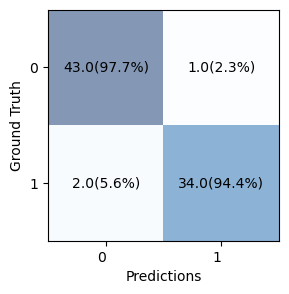

In [48]:
confusion_matrix(y_test, y_pred, visualize=True)

In [50]:
recall(y_test, y_pred)

0.9444444444444444

In [52]:
precision(y_test, y_pred)

0.9714285714285714

#### Visually comparing the predictions and ground truth

Text(0.5, 1.0, 'Ground Truth')

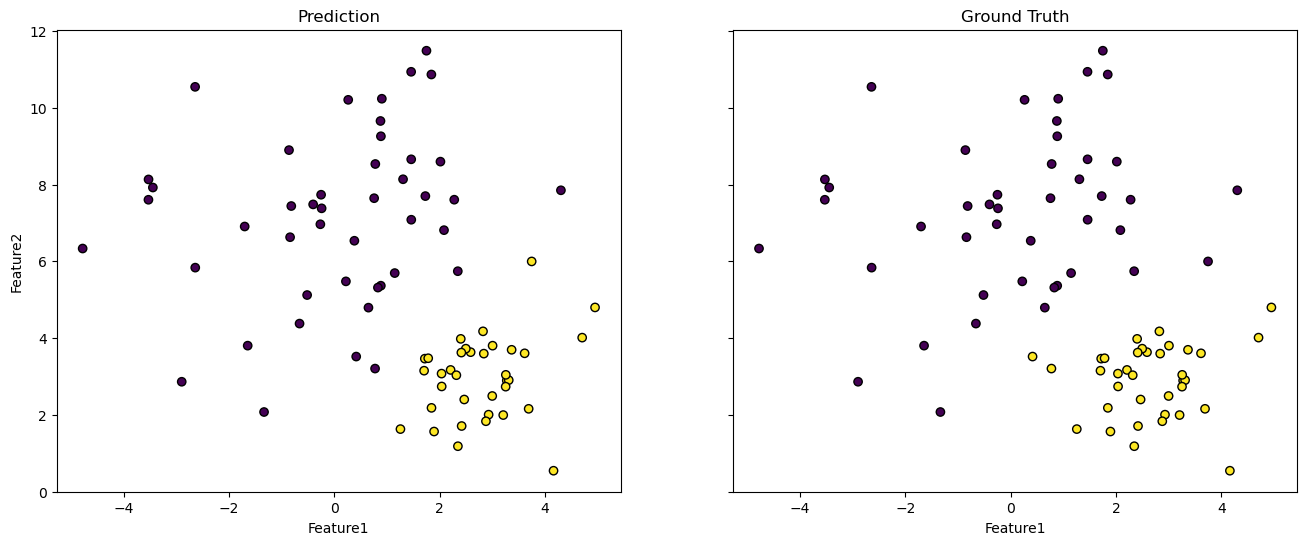

In [54]:
# Data Visualization
fig, ax = plt.subplots(1,2, figsize=(16,6), sharey=True)
ax[0].scatter(X_test[:,0], X_test[:,1], c=y_pred, edgecolors='k')
ax[0].set_xlabel('Feature1')
ax[0].set_ylabel('Feature2')
ax[0].set_title('Prediction')
ax[1].scatter(X_test[:,0], X_test[:,1], c=y_test, edgecolors='k')
ax[1].set_xlabel('Feature1')
ax[1].set_title('Ground Truth')

#### sklearn Results

In [54]:
skperceptron = skPerceptron(random_state=42)

In [56]:
skperceptron.fit(X_train, y_train)

Perceptron(random_state=42)

In [58]:
y_pred = skperceptron.predict(X_test)

In [60]:
# Accuracy score
skas(y_test, y_pred)

0.9625

In [62]:
skcm(y_test, y_pred)

array([[43,  1],
       [ 2, 34]], dtype=int64)

In [64]:
skrc(y_test, y_pred)

0.9444444444444444

**The results obtained from Scikit-learn match the results from the current package and linear activation!**